Experiment 8: Classification using k-NN and Decision Tree

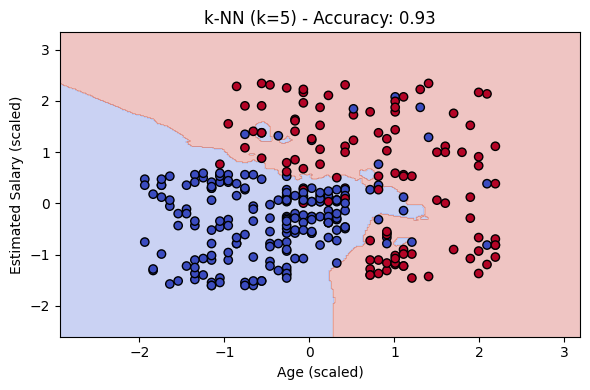

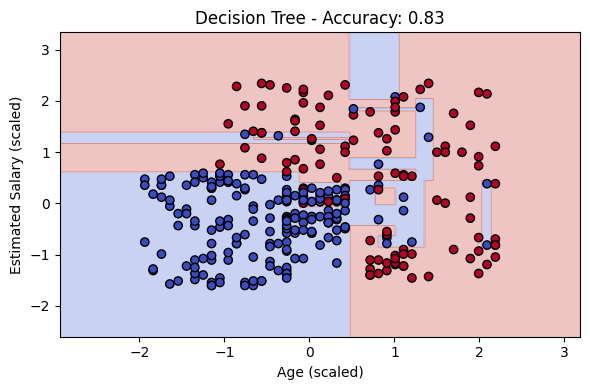

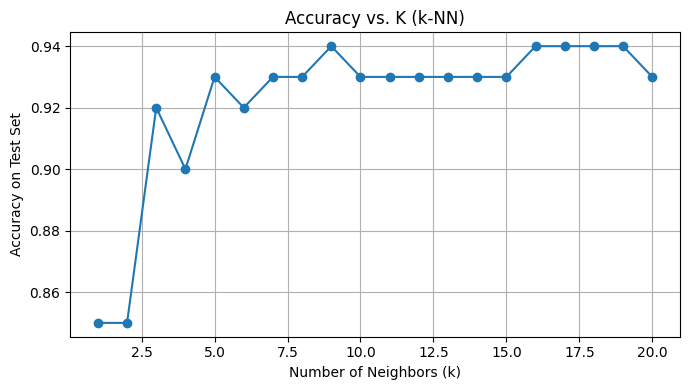

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Social_Network_Ads.csv")

# Preprocessing
df = df.drop(columns=['User ID', 'Gender'])  # Drop unneeded columns
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train k-NN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)

# Train Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
tree_acc = accuracy_score(y_test, y_pred_tree)

# Decision boundary plot function
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.tight_layout()
    plt.show()

# Visualize decision boundaries
plot_decision_boundary(knn, X_train_scaled, y_train, f"k-NN (k=5) - Accuracy: {knn_acc:.2f}")
plot_decision_boundary(tree, X_train_scaled, y_train, f"Decision Tree - Accuracy: {tree_acc:.2f}")

# Accuracy vs. K plot
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(7, 4))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K (k-NN)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy on Test Set")
plt.grid(True)
plt.tight_layout()
plt.show()
